In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
vgg=VGG16()

In [3]:
image=load_img("datasets/airplane-dataset/A/0-100.jpg")

In [4]:
np.array(image).shape

(98, 98, 3)

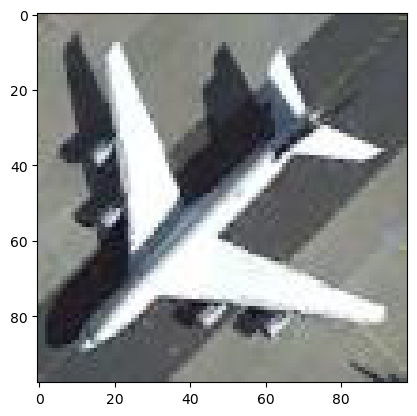

In [5]:
plt.imshow(image)
plt.show()

In [6]:
datagen = ImageDataGenerator(validation_split=0.2)

# Eğitim verisi
train_data = datagen.flow_from_directory(
    "datasets/airplane-dataset/",
    target_size=(224, 224),
    subset="training",
    batch_size=32,
    class_mode="categorical"
)

# Doğrulama verisi
test_data = datagen.flow_from_directory(
    "datasets/airplane-dataset/",
    target_size=(224, 224),
    subset="validation",
    batch_size=32,
    class_mode="categorical"
)

Found 2406 images belonging to 5 classes.
Found 599 images belonging to 5 classes.


In [7]:
type(train_data)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [8]:
plane_types=5

In [9]:
vgg_layers=vgg.layers

In [10]:
vgg_layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=fc1, built=True>,
 <Dense name=fc2, built=True>,
 <Dense name=predictions, built=True>]

In [11]:
kullanilacak_katman_sayisi=len(vgg_layers)-1

In [12]:
kullanilacak_katman_sayisi

22

In [13]:
model = Sequential()

for layers in vgg_layers:
    model.add(layers)

for layers in model.layers:
    layers.trainable=False

model.add(Dense(units=plane_types,activation="softmax"))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,362,549 (527.81 MB)

 Trainable params: 5,005 (19.55 KB)

 Non-trainable params: 138,357,544 (527.79 MB)

In [15]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [94]:
epochs = 6
batch_size = 100

model.fit(
    train_data,
    steps_per_epoch=int(len(train_data)/batch_size),
    epochs=epochs,
    validation_data=test_data,
    validation_steps=int(len(test_data)/batch_size)
)

Epoch 1/6
76/76 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.3286 - loss: 1.5500 - val_accuracy: 0.3723 - val_loss: 1.5334
Epoch 2/6
76/76 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.3519 - loss: 1.5296 - val_accuracy: 0.3923 - val_loss: 1.5188
Epoch 3/6
76/76 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.3695 - loss: 1.5125 - val_accuracy: 0.4107 - val_loss: 1.5051
Epoch 4/6
76/76 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.3746 - loss: 1.4990 - val_accuracy: 0.4307 - val_loss: 1.4919
Epoch 5/6
76/76 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.3923 - loss: 1.4804 - val_accuracy: 0.4608 - val_loss: 1.4795
Epoch 6/6
76/76 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.4117 - loss: 1.4689 - val_accuracy: 0.4758 - val_loss: 1.4673


In [96]:
img=Image.open("datasets/9-81.jpg").resize((224,224))

In [98]:
img=np.array(img)

In [100]:
img.shape

(224, 224, 3)

In [102]:
img = img.reshape(-1, 224, 224, 3)
img.shape

(1, 224, 224, 3)

In [104]:
img=preprocess_input(img)

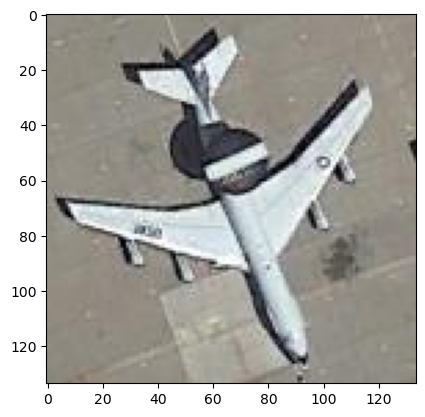

In [106]:
img_show=load_img("datasets/9-81.jpg")
plt.imshow(img_show)
plt.show()

In [108]:
pred=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


In [110]:
pred

array([[0.19930035, 0.17796072, 0.20024382, 0.24812794, 0.17436717]],
      dtype=float32)

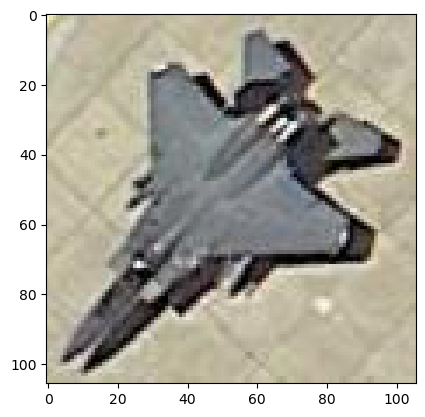

In [112]:
img=Image.open("datasets/10-62.jpg").resize((224,224))
img=np.array(img)
img = img.reshape(-1, 224, 224, 3)
img=preprocess_input(img)

img_show=load_img("datasets/10-62.jpg")
plt.imshow(img_show)
plt.show()

In [86]:
pred=model.predict(img)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


array([[0.19867179, 0.18680383, 0.1814618 , 0.23336455, 0.19969808]],
      dtype=float32)